# Práctica 3: Procesamiento de imágenes

### Participantes:
- Gerardo León Quintana
- Susana Suárez Mendoza

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Ejercicio 1:

El negativo de una imagen es el resultado de aplicar la siguiente operación: 255-imagen(i,j). Aplica esta operación  sobre la imagen2.png y, posteriormente, crea un video que vaya mezclando las dos imágenes por columnas, de forma que aparezca primero el negativo de la imagen y vaya apareciendo poco a poco la imagen original. El número de iteraciones debe ser igual al ancho de la imagen y en cada una se debe ir desplazando una columna a la derecha la imagen original sobre el negativo. Guarda el vídeo con el nombre vídeo2.mp4.

In [13]:
img = cv.imread('images/imagen2.png')
negative_image = 255 - img

height, width, _ = img.shape

fourcc = cv.VideoWriter_fourcc(*'mp4v')
fps = 60.0
video_writer = cv.VideoWriter('videos/video2.mp4', fourcc, fps, (width, height))

for i in range(width):
    img_act = img.copy()
    img_act[:, i:] = negative_image[:, i:]
    video_writer.write(img_act)

video_writer.release()


video = cv.VideoCapture('videos/video2.mp4')
ret, frame = video.read()

while True:

    ret, frame = video.read()

    if not ret:
        video.set(cv.CAP_PROP_POS_FRAMES, 0)
        continue
    
    cv.imshow('Original Image', img)
    cv.imshow('Video', frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cv.destroyAllWindows()
video.release()


### Ejercicio 2:

Ecualiza el histograma de la imagen imagen3.png y luego elimina el ruido utilizando un filtro bilateral con un diámetro d=10 y valores de sigma de 11 y 11. Guarda el resultado como imagen3_salida.png.

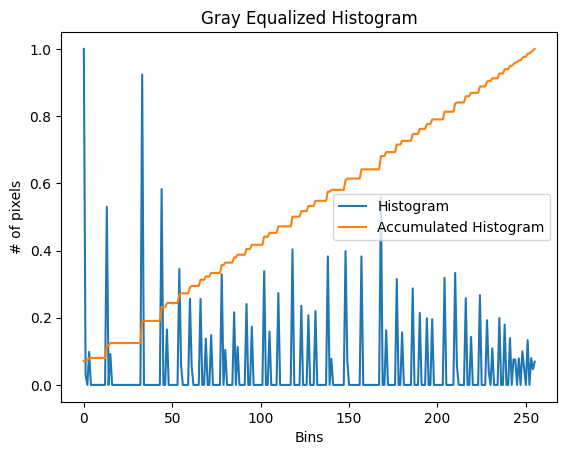

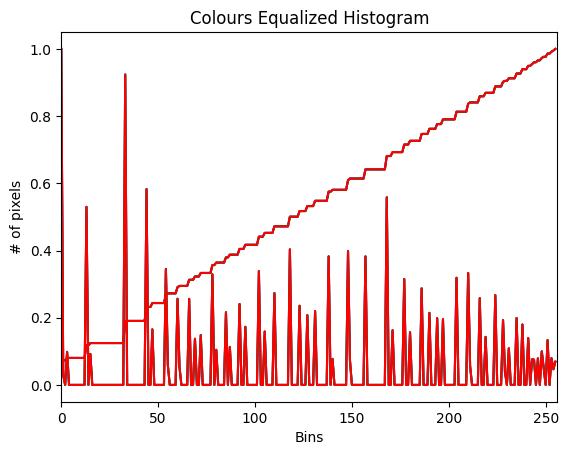

In [5]:
img = cv.imread('images/imagen3.png')

cv.imshow('Original Image', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow('Gray-Scale Image', gray)
cv.imwrite('gif/imagen3_gray.png', gray)

gray_equalized = cv.equalizeHist(gray)
cv.imshow('Gray Equalized', gray_equalized)
cv.imwrite('gif/imagen3_gray_equalized.png', gray_equalized)  

gray_hist = cv.calcHist([gray_equalized], [0] , None,[256], [0,256])
gray_cum = np.cumsum(gray_hist)
plt.figure()
plt.title('Gray Equalized Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist/np.max(gray_hist))
plt.plot(gray_cum/np.max(gray_cum))
plt.legend(['Histogram', 'Accumulated Histogram'],loc='right')
plt.savefig('gif/imagen3_gray_equalized_histogram.jpg')
plt.show()


colors = ('b','g','r')

colour_equalized = img
for i, col in enumerate(colors):
    colour_equalized[:,:,i] = cv.equalizeHist(img[:,:,i])
    hist = cv.calcHist([colour_equalized], [i], None, [256], [0,256])
    hist_cum = np.cumsum(hist)
    plt.plot(hist/np.max(hist), color=col)
    plt.plot(hist_cum/np.max(hist_cum), color=col)
    plt.xlim([0,256])
plt.title('Colours Equalized Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.savefig('gif/imagen3_colour_equalized_histogram.jpg')
plt.show()

cv.imshow('Colour Equalized', colour_equalized)

bilateral_gray_equalized = gray_equalized
for _ in range(10):
    bilateral_gray_equalized = cv.bilateralFilter(bilateral_gray_equalized, 10, 11, 11)
    image=bilateral_gray_equalized
    cv.imshow('Bilateral - gray_equalized', image)
cv.imwrite('gif/bilateral_gray.png', bilateral_gray_equalized)

bilateral_colours_equalized = colour_equalized
for _ in range(10):
    bilateral_colours_equalized = cv.bilateralFilter(bilateral_colours_equalized, 10, 11, 11)
    image=bilateral_colours_equalized
    cv.imshow('Bilateral - color_equalized', image)
cv.imwrite('gif/bilateral_color.png', bilateral_colours_equalized)

cv.imwrite('images/imagen3_salida.png', bilateral_colours_equalized)

cv.waitKey(0)
cv.destroyAllWindows()

### Ejercicio 3:

Con la imagen4.jpg, crea un vídeo de 100 frames aplicando un filtro mediano de radio (ksize) igual a 7. Aplica el filtro en cada iteración al resultado de la iteración anterior. Guarda el vídeo con el nombre video4.mp4.

In [12]:
img = cv.imread('images/imagen4.jpg')

height, width, _ = img.shape

fourcc = cv.VideoWriter_fourcc(*'mp4v')
fps =5.0
video_writer = cv.VideoWriter('videos/video4.mp4', fourcc, fps, (width, height))

frames = 100
ksize = 7
current_img = img.copy()

for i in range(frames):
    current_img = cv.medianBlur(current_img, ksize)
    video_writer.write(current_img)

video_writer.release()

video = cv.VideoCapture('videos/video4.mp4')
ret, frame = video.read()

while True:

    ret, frame = video.read()
    
    if not ret:
        video.set(cv.CAP_PROP_POS_FRAMES, 0)
        continue
    
    cv.imshow('Original Image', img)
    cv.imshow('Video', frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cv.destroyAllWindows()
video.release()

### Ejercicio 4:

Calcula la norma del gradiente de la imagen5.jpg utilizando los operadores de Sobel. Umbraliza los valores de la norma de forma que los valores mayores o iguales a 128 se igualen a 255 y los menores de 128 se igualen a 0. Finalmente, aplica un filtro Gaussiano de radio (7,7) con sigma=-1. Guarda el resultado con el nombre imagen5_salida.png. 

In [7]:
img = cv.imread('images/imagen5.png')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

dx = cv.Sobel(gray, cv.CV_64F, 1, 0)
dy = cv.Sobel(gray, cv.CV_64F, 0, 1)

norm = np.sqrt(dx**2 + dy**2)

norm = norm.astype(np.uint8)

_, norm_thresh = cv.threshold(norm, 128, 255, cv.THRESH_BINARY)

gaussian_filter = cv.GaussianBlur(norm_thresh, (7, 7), sigmaX=-1)


cv.imshow('Original Image', img)
cv.imshow('Gaussian Filter', gaussian_filter)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imwrite('images/imagen5_salida.png', gaussian_filter)

True

### Ejercicio 5:

Elimina el ruido de la imagen6.png con alguno de los algoritmos que conoces. Aplica el filtro múltiples veces para eliminar lo mejor posible el ruido. Guarda la imagen de salida con el nombre imagen6_salida.png. 

In [4]:
img = cv.imread('images/imagen6.png')

cv.imshow('Original Image', img)

img_bilateral = img
for _ in range(5):
    img_bilateral = cv.bilateralFilter(img_bilateral, 10, 150, 120)
cv.imshow('Bilateral Filter', img_bilateral)
cv.imwrite('gif/bilateral_5.png', img_bilateral)

img_blur = img
for _ in range(5):
    img_blur = cv.medianBlur(img_blur, 3)
cv.imshow('Median Blur Filter', img_blur)
cv.imwrite('gif/median_5.png', img_blur)

img_gaussian = img
for i in range(5):
    img_gaussian = cv.GaussianBlur(img_gaussian, (11,11), 0)
cv.imshow('Gaussian Filter', img_gaussian)
cv.imwrite('gif/gaussian_5.png', img_gaussian)

cv.waitKey(0)
cv.destroyAllWindows()

cv.imwrite('images/imagen6_salida.png', img_blur)

True

### Ejercicio 6:

Mezcla las imágenes imagen7_1.jpg e imagen7_2.png de forma no lineal utilizando la siguiente expresión:

$$ I_3 = \frac{ 1+ \cos{(\frac{\alpha}{180}\pi )}}{2} I_1 + \frac{ 1- \cos{(\frac{\alpha}{180}\pi )}}{2} I_2$$ 

Crea un vídeo de 360 frames aumentando el ángulo en 1° en cada iteración y guárdalo con el nombre de video7.mp4.

In [14]:
img_1 = cv.imread('images/imagen7_1.jpg')
img_2 = cv.imread('images/imagen7_2.png')

if img_1.shape != img_2.shape:
    img2 = cv.resize(img_2, (img_1.shape[1], img_1.shape[0]))

fourcc = cv.VideoWriter_fourcc(*'mp4v')
fps = 40.0
height_1, width_1, _ = img_1.shape 
video_writer = cv.VideoWriter('videos/video7.mp4', fourcc, fps, (width_1, height_1))

frames = 360

def mixture(img_1, img_2, alpha):
    img_mix1 = ((1 + np.cos(np.pi * alpha / 180)) / 2) * img_1
    img_mix2 = ((1 - np.cos(np.pi * alpha / 180)) / 2) * img_2
    return img_mix1 + img_mix2

for alpha in range(frames):
    img_3 = mixture(img_1, img_2, alpha)
    img_3 = np.clip(img_3, 0, 255).astype(np.uint8)
    
    video_writer.write(img_3)

video_writer.release()

video = cv.VideoCapture('videos/video7.mp4')
ret, frame = video.read()

while True:

    ret, frame = video.read()
    
    if not ret:
        video.set(cv.CAP_PROP_POS_FRAMES, 0)
        continue

    cv.imshow('Image_7_1', img_1)
    cv.imshow('Image_7_2', img_2)
    cv.imshow('Video', frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cv.destroyAllWindows()
video.release()